In [1]:
import random
import networkx as nx
'''ЭТА ЧАСТЬ КОДА ИСКЛЮЧИТЕЛЬНО ДЛЯ ГЕНЕРИРОВАНИЯ ВХОДНЫХ ДАННЫХ, ЗАПУСТИТЬ ЕДИНОЖДЫ ЕСЛИ ТАКОВЫЕ НУЖНЫ ДЛЯ ТЕСТА РАБОТОСПОСОБНОСТИ АЛГОРИТМА'''
# Параметры генерации данных
NUM_SETS = 50  
MIN_NODES = 100
MAX_NODES = 10000
MIN_EDGES = 150
MAX_EDGES = 20000
MIN_WEIGHT = 1
MAX_WEIGHT = 100

def generate_graph(num_nodes, num_edges):
    graph = nx.Graph()
    nodes = list(range(1, num_nodes + 1))

    for _ in range(num_edges):
        u, v = random.sample(nodes, 2)  # Выбираем две разные вершины
        weight = random.randint(MIN_WEIGHT, MAX_WEIGHT)
        graph.add_edge(u, v, weight=weight)

    return graph

def save_graph(graph, filename):
    with open(filename, 'w') as f:
        for u, v, data in graph.edges(data=True):
            f.write(f"{u} {v} {data['weight']}\n")

# Генерация наборов данных
for i in range(NUM_SETS):
    num_nodes = random.randint(MIN_NODES, MAX_NODES)
    num_edges = random.randint(MIN_EDGES, MAX_EDGES)
    graph = generate_graph(num_nodes, num_edges)
    save_graph(graph, f"dataset_{i + 1}.txt")

print("+50 txt-файлов в директорию!")


Наборы данных успешно созданы и сохранены в файлы!


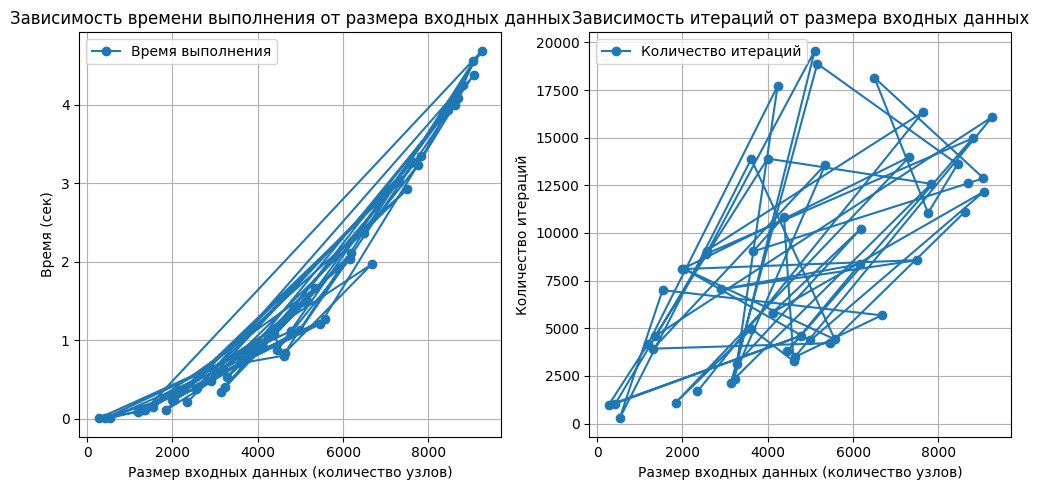

In [10]:
import time
import matplotlib.pyplot as plt

def load_graph(filename):
    edges = []
    nodes = set()
    with open(filename, 'r') as f:
        for line in f:
            u, v, weight = map(int, line.split())
            edges.append((weight, u, v))
            nodes.update([u, v])
    return edges, list(nodes)

def kruskal_algorithm(edges, nodes):
    start_time = time.time()

    edges.sort()  # Сортируем рёбра по весу
    mst = []
    iterations = 0

    # Создаём массив компонент связности
    components = {node: node for node in nodes}  

    for weight, u, v in edges:
        iterations += 1

        # Проверяем, принадлежат ли вершины разным компонентам
        if components[u] != components[v]:
            mst.append((u, v, weight))
            old_component = components[v]
            new_component = components[u]

            # Обновляем компоненты связности
            for node in nodes:
                if components[node] == old_component:
                    components[node] = new_component

        if len(mst) == len(nodes) - 1:
            break

    end_time = time.time()
    return mst, end_time - start_time, iterations

# Подготовка данных
datasets = [f"dataset_{i}.txt" for i in range(1, 51)]
sizes = []
times = []
iterations = []

for dataset in datasets:
    edges, nodes = load_graph(dataset)
    mst, exec_time, iter_count = kruskal_algorithm(edges, nodes)

    sizes.append(len(nodes))  # Размер графа
    times.append(exec_time)
    iterations.append(iter_count)

# Визуализация результатов
plt.figure(figsize=(10, 5))

# График зависимости времени от размера входных данных
plt.subplot(1, 2, 1)
plt.plot(sizes, times, 'o-', label="Время выполнения")
plt.xlabel("Размер входных данных (количество узлов)")
plt.ylabel("Время (сек)")
plt.title("Зависимость времени выполнения от размера входных данных")
plt.legend()
plt.grid()

# График зависимости количества итераций от размера входных данных
plt.subplot(1, 2, 2)
plt.plot(sizes, iterations, 'o-', label="Количество итераций")
plt.xlabel("Размер входных данных (количество узлов)")
plt.ylabel("Количество итераций")
plt.title("Зависимость итераций от размера входных данных")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
